In [103]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import trapz
import glob
from scipy import quisquare

AttributeError: module 'matplotlib' has no attribute '_version_'

In [75]:
def cross_section(Z1,Z2,Ma,Mp,Theta,K):
    
    Theta = np.radians(Theta)
    
    t = ((0.72*Z1*Z2)/K)**2
    d = np.sqrt(1 -((Mp*np.sin(Theta))/Ma)**2)
    g = (np.cos(Theta) + d)**2
    f = np.sin(Theta)**4* d
         
    sigma = t*(g/f)
         
    return sigma

In [76]:
d11 = glob.glob('*M.dat')
d21 = glob.glob('*P.dat')
d11.sort()
d21.sort()

d12 = glob.glob('*M.sra')
d12.sort()

In [77]:
alpha = []
i = 0
for x in d12:
    with open (d12[i],'rb') as myfile:
        t = str([(x.strip()) for ei, x in enumerate(myfile) if ei in [0]])
        t = t.split(' ')
        alpha.append(t[1])
        i += 1

i = 0
datafixo = []
for x in d11:
    datafixo.append(np.loadtxt(d11[i]))
    i += 1 
    
i = 0
areafixo = []
for x in datafixo:
    areafixo.append(np.sum(datafixo[i][474:491]))
    i += 1

i = 0
datamovel = []
for x in d21:
    datamovel.append(np.loadtxt(d21[i]))
    i += 1 

i = 0
areamovel = []
for x in datamovel:
    areamovel.append(np.sum(datamovel[i][416:436]))
    i += 1

In [78]:
areafixo.reverse()
areamovel.reverse()
alpha.reverse()

In [111]:
dsigma = cross_section(1,79,197,1,170,2.4)
darea = np.divide(areamovel,areafixo)
constante = 1.613 * dsigma

x1 = np.arange(60,151,1)
y1 = cross_section(1,79,197,1,x1,2.4)
x2 = [int(x) for x in alpha]
y2 = constante*darea

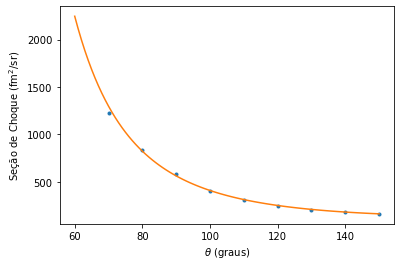

In [116]:
plt.figure()

plt.plot(x2,y2,'.')
plt.plot(x1,y1)
plt.xlabel(r'$\theta$ (graus)')
plt.ylabel(r'Seção de Choque (fm$^2$/sr)')


plt.savefig('fig1.jpeg')